In [33]:
%matplotlib inline

import os
import glob
import scanpy as sc
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
import seaborn as sns 
import matplotlib.pyplot as plt
import time 
import datetime

In [24]:
from scipy.stats import zscore 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from scipy.stats import mannwhitneyu, tiecorrect, rankdata
from statsmodels.stats.multitest import multipletests

In [2]:
adata_file = '/home/ngr4/project/collabs/grants/czi_rp_2103/data/processed/rpczi_cpb.h5ad'
pfp = '/home/ngr4/project/collabs/grants/czi_rp_2103/results/'
adata = sc.read(adata_file)
adata.obs.head()

,batch,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,pmito,n_genes
AAACCCATCACAAGAA-1-CPB3,CPB3,506,6.228511,989.0,6.897705,47.118301,57.937310,69.059656,99.393327,0.016178,506
AAACGAATCCGATCGG-1-CPB3,CPB3,826,6.717805,1468.0,7.292337,35.286104,44.618529,57.356948,77.792916,0.078338,826
AAACGCTAGTTCATCG-1-CPB3,CPB3,528,6.270988,971.0,6.879356,41.091658,52.317199,66.220391,97.116375,0.018538,528
AAACGCTCAAGGCGTA-1-CPB3,CPB3,477,6.169611,850.0,6.746412,41.176471,53.882353,67.411765,100.000000,0.043529,477
AAACGCTTCGGACCAC-1-CPB3,CPB3,1448,7.278629,3554.0,8.176110,36.662915,45.835678,56.387169,73.325830,0.016882,1448


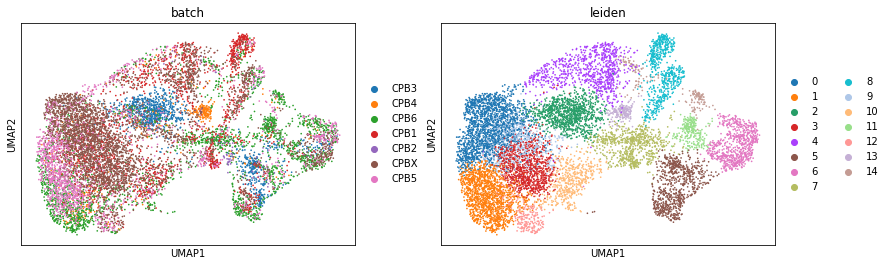

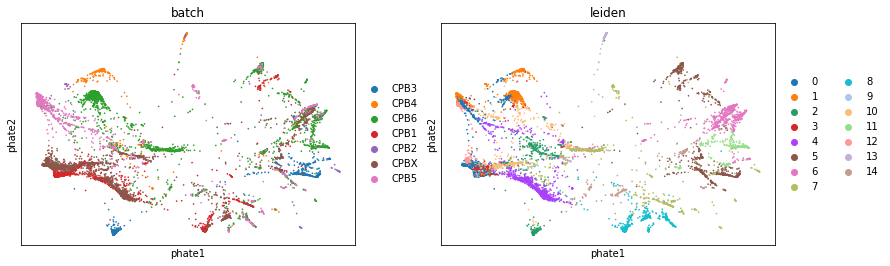

In [9]:
sc.tl.pca(adata)
k = 30
sc.external.pp.bbknn(adata, n_pcs=50, neighbors_within_batch=int(k/len(adata.obs['batch'].unique())))
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.external.tl.phate(adata, gamma=0)
sc.pl.umap(adata, color=['batch', 'leiden'])
sc.external.pl.phate(adata, color=['batch', 'leiden'])

/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/bbknn/__init__.py:294: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = bbknn_out[0]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/bbknn/__init__.py:295: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = bbknn_out[1]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/graphtools/base.py:130: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(data, pd.SparseDataFrame):


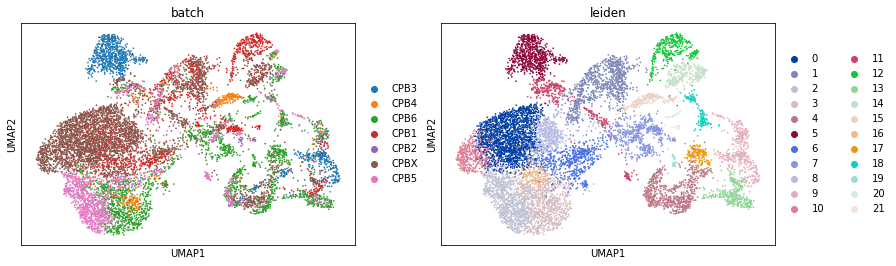

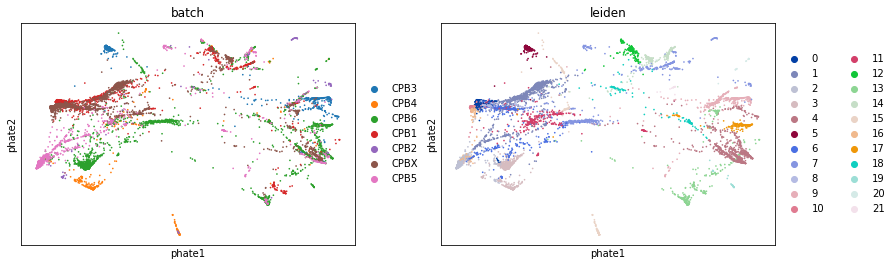

In [10]:
k = 100
sc.external.pp.bbknn(adata, n_pcs=50, neighbors_within_batch=int(k/len(adata.obs['batch'].unique())))
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.external.tl.phate(adata, gamma=0)
sc.pl.umap(adata, color=['batch', 'leiden'])
sc.external.pl.phate(adata, color=['batch', 'leiden'])

In [11]:
sdata = adata[adata.obs['batch']!='CPB3', :]

/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/bbknn/__init__.py:294: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = bbknn_out[0]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/bbknn/__init__.py:295: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = bbknn_out[1]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/graphtools/base.py:130: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(data, pd.SparseDataFrame):


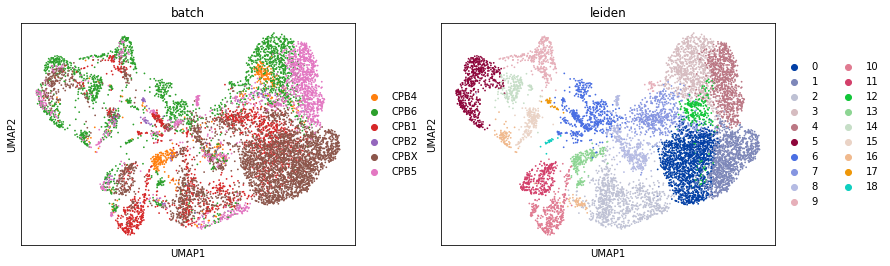

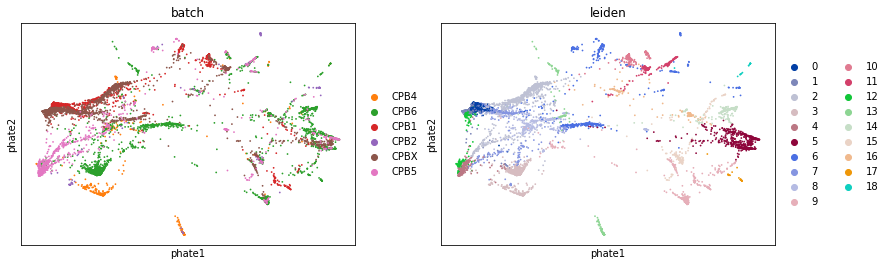

In [13]:
sc.tl.pca(sdata)
k = 100
sc.external.pp.bbknn(sdata, n_pcs=50, neighbors_within_batch=int(k/len(sdata.obs['batch'].unique())))
sc.tl.umap(sdata)
sc.tl.leiden(sdata)
sc.external.tl.phate(sdata, gamma=0)
sc.pl.umap(sdata, color=['batch', 'leiden'])
sc.external.pl.phate(sdata, color=['batch', 'leiden'])

/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/bbknn/__init__.py:294: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = bbknn_out[0]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/bbknn/__init__.py:295: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = bbknn_out[1]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/graphtools/base.py:130: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(data, pd.SparseDataFrame):


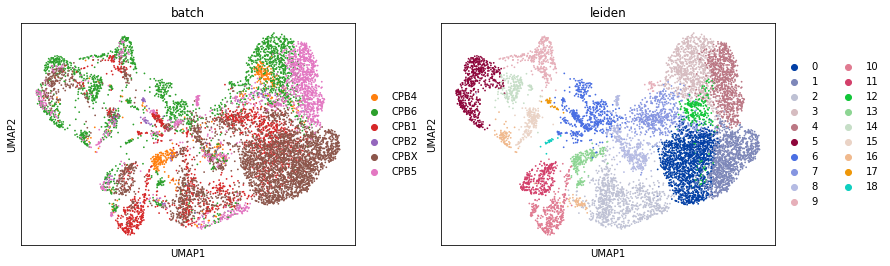

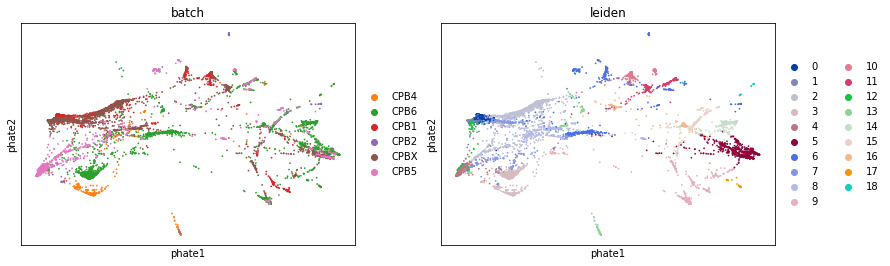

In [14]:
k = 100
sc.external.pp.bbknn(sdata, n_pcs=50, neighbors_within_batch=int(k/len(sdata.obs['batch'].unique())))
sc.tl.umap(sdata)
sc.tl.leiden(sdata)
sc.external.tl.phate(sdata, gamma=0)
sc.pl.umap(sdata, color=['batch', 'leiden'])
sc.external.pl.phate(sdata, color=['batch', 'leiden'])

/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/bbknn/__init__.py:294: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = bbknn_out[0]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/bbknn/__init__.py:295: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = bbknn_out[1]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/graphtools/base.py:130: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(data, pd.SparseDataFrame):


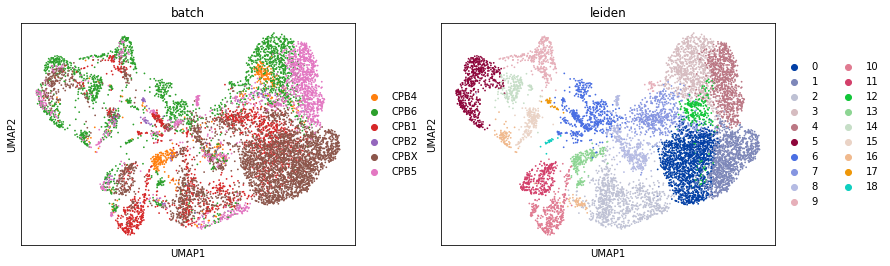

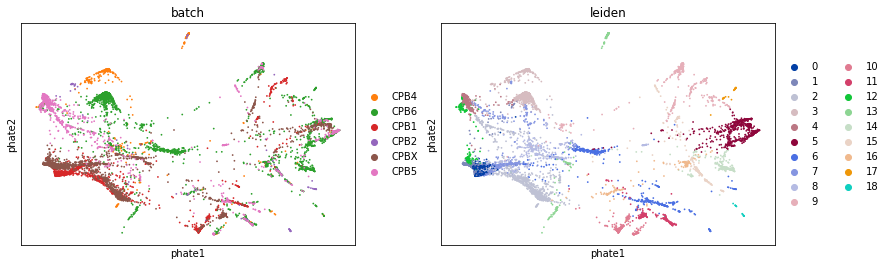

In [15]:
k = 100
sc.external.pp.bbknn(sdata, n_pcs=100, neighbors_within_batch=int(k/len(sdata.obs['batch'].unique())))
sc.tl.umap(sdata)
sc.tl.leiden(sdata)
sc.external.tl.phate(sdata, gamma=0)
sc.pl.umap(sdata, color=['batch', 'leiden'])
sc.external.pl.phate(sdata, color=['batch', 'leiden'])

In [18]:
sc.pp.combat(adata)

/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scanpy/preprocessing/_combat.py:340: RuntimeWarning: divide by zero encountered in true_divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/graphtools/base.py:130: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(data, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=10712 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


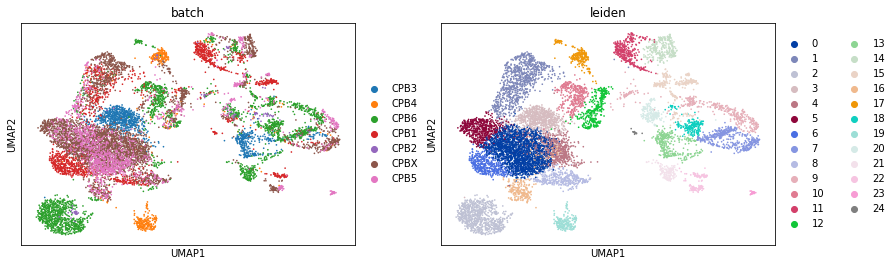

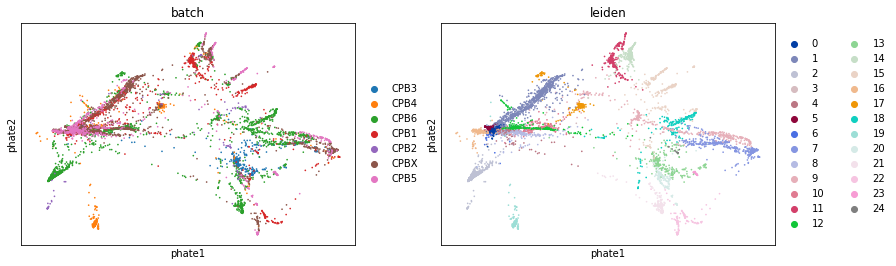

In [21]:
k = 30
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_neighbors=k, n_pcs=50)
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.external.tl.phate(adata, gamma=0)
sc.pl.umap(adata, color=['batch', 'leiden'])
sc.external.pl.phate(adata, color=['batch', 'leiden'])

/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/graphtools/base.py:130: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(data, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=10712 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


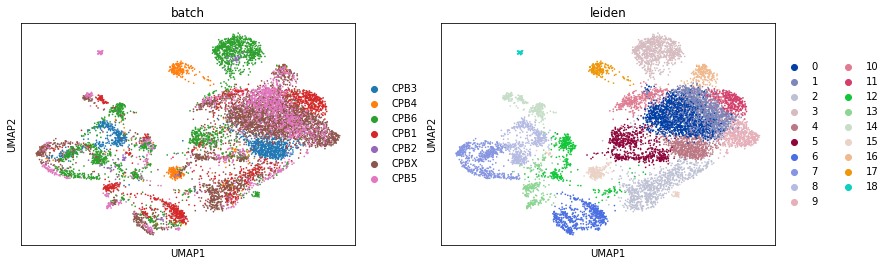

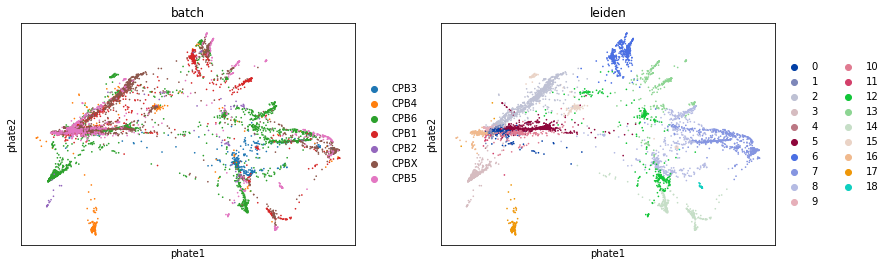

In [22]:
k = 100
sc.pp.neighbors(adata, n_neighbors=k, n_pcs=50)
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.external.tl.phate(adata, gamma=0)
sc.pl.umap(adata, color=['batch', 'leiden'])
sc.external.pl.phate(adata, color=['batch', 'leiden'])

Found 3 genes with zero variance.


/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scanpy/preprocessing/_combat.py:340: RuntimeWarning: invalid value encountered in true_divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scanpy/preprocessing/_combat.py:340: RuntimeWarning: divide by zero encountered in true_divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/graphtools/base.py:130: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(data, pd.SparseDataFrame):


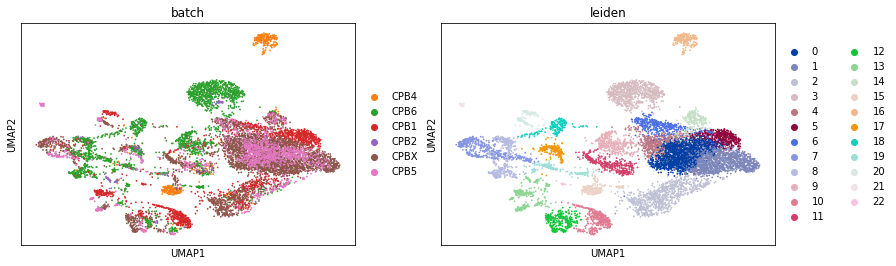

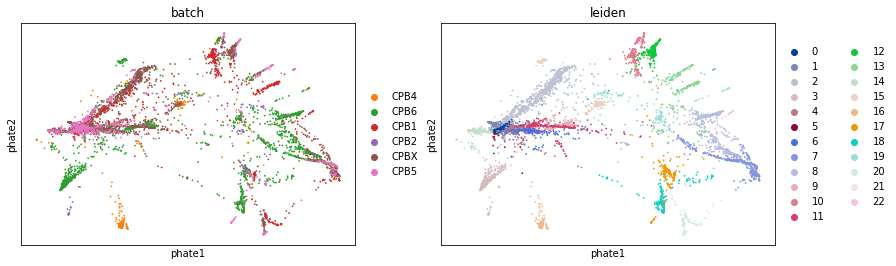

In [23]:
sc.pp.combat(sdata)
k = 30
sc.tl.pca(sdata)
sc.pp.neighbors(sdata, n_neighbors=k, n_pcs=50)
sc.tl.umap(sdata)
sc.tl.leiden(sdata)
sc.external.tl.phate(sdata, gamma=0)
sc.pl.umap(sdata, color=['batch', 'leiden'])
sc.external.pl.phate(sdata, color=['batch', 'leiden'])

In [30]:
# define markers & cell types
## TODO (before final polishes): add canonical cell type markers for human lung from Table S1 https://www.biorxiv.org/content/10.1101/742320v2.full.pdf
## REF: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5135277/ (most lung tissue markers come from here)
cell_markers = {'Basal': ['KRT5', 'DAPL1', 'TP63'],
                'Basal (proliferating)': ['ADH7', 'MKI67', 'TOP2A', 'CDK1'],
                'Hillock': ['KRT4', 'KRT13'],
                'Club': [ 'KRT15', 'CD74','CXCL6'],
                'Ciliated': ['FOXJ1', 'CCDC153', 'CCDC113', 'MLF1', 'LZTFL1','TUBB1','TP73','CCDC78'],
                'Tuft': ['POU2F3', 'AVIL', 'MAFF','MIAT','NOS2'],
                'Ionocyte': ['FOXI1', 'CFTR', 'ASCL3'],
                'Goblet': ['MUC5AC', 'MUC5B', 'SPDEF'],
                'Epithelial':['ABCA3','LPCAT1','NAPSA','SFTPB','SFTPC','SLC34A2'],
                'Neuroendocrine':['ACADSB','ADA','AFAP1','CPE'],
                'Dendritic':['ITGAX','CCR7','CD1A','LY75','CD207'], 
#                 'Macrophage':['CD68','CD14','CCL18','CD163'],
                'Endothelial':['CD34','PECAM1','VWF'],
                'Fibroblast':['THY1','CD36','PDGFRA','PTPN13'],
                'Tcell':['CD3E','CD3D','CD3G','CD8A','CD8B','CD4'],
                'Granulocyte':['CCR5','SMAD1','ITGAM'],
#                 'Alveolar':['SLC34A2','ABCA3','CD44'],
                'AT1':['SLC34A2','ABCA3','CD44','AGER','PDPN','CLIC5'],
                'AT2':['SLC34A2','ABCA3','CD44','SFTPB','SFTPC','SFTPD','MUC1'],
                'Myofibroblast':['ACTA2'],
                'Monocyte':['CD36','CD14','CD68'],
                'NK':['NCR1'],
                'Progenitor':['TM4SF1','CEACAM6'],
#                 'Neutrophil':['S100A9','S100A8','S100A12','VCAN','FCN1',
#                               'CSTA','TSPO','CD14','MNDA','CTSD','PLBD1'], # from Tianyang (Iwasaki lab) ORIGINAL
                # updated 051820
                'Eosinophil':['RNASE2','RNASE3','LGALS1','RETN','AC020656.1',
                              'H1FX','SLC44A1','AL355922.1','RFLNB','SERPINB10'], # from Tianyang (Iwasaki lab) ORIGINAL
#                 'Macrophage':['S100A9','S100A8','FCGR3A','CD14','CD68','FCGR1A','MARCO','MSR1','MRC1','C1QB','C1QA','FABP4','APOC1','APOE','PPARG'],
#                 'Monocyte':['S100A9','S100A8','FCGR3A','CD14','CD68','FCGR1A','RNASE2','RNASE3','FCN1','TNFRSF1B','S100A12','VCAN','CCR2','SDS'],
#                 'Monocyte':['CCR2', 'FCN1', 'RNASE2', 'RNASE3', 'S100A12', 'SDS', 'TNFRSF1B', 'VCAN'], # no overlap btw Macrophage/Monocyte/Neutrophil
                'Monocyte':['CCR2', 'FCN1', 'RNASE2', 'S100A12', 'SDS', 'TNFRSF1B', 'VCAN'],
                'Macrophage':['APOC1', 'APOE', 'C1QA', 'C1QB', 'FABP4', 'MARCO', 'MRC1', 'MSR1', 'PPARG'], # no overlap btw Macrophage/Monocyte/Neutrophil
                'Neutrophil':['CEACAM1', 'CEACAM8', 'CSF3R', 'CXCR1', 'CXCR2', 'FCGR3B'], # no overlap btw Macrophage/Monocyte/Neutrophil
#                 'Neutrophil':['S100A9','S100A8','FCGR3A','CEACAM8','CXCR1','CXCR2','CEACAM1','FCGR3B','CSF3R'],
#                 'Eosinophil':['RNASE2','RNASE3','IL5RA','CCR3','EPX','PRG2','PRG3','PTGDR2','SIGLEC8','GATA2'], # don't use RNASE2/3 since they overlap
#                 'Eosinophil':['IL5RA','CCR3','PRG2','PTGDR2','SIGLEC8','GATA2'], # don't use RNASE2/3 since they overlap
#                 'Eosinophil':['IL5RA','CCR3','PRG2','PTGDR2','SIGLEC8','GATA2', 'EPO','CD9','RNASE3','RETN','H1FX','RFLNB'], # added EPO and CD9 <>                
               }


# subset data to markers
genes = [g for k,v in cell_markers.items() for g in v]
x = pd.DataFrame(adata[:,genes].X, columns=genes)
x['cluster'] = adata.obs['leiden'].to_list()
add_pcs = True
if add_pcs:
    # add PCs?
    pcs = ['PC1','PC2']
    for i,pc in enumerate(pcs):       
        x[pc] = adata.obsm['X_pca'][:,i]
    genes = genes + pcs

# standard scale
x.loc[:,genes] = zscore(x.loc[:,genes])

... storing 'init_ctype' as categorical


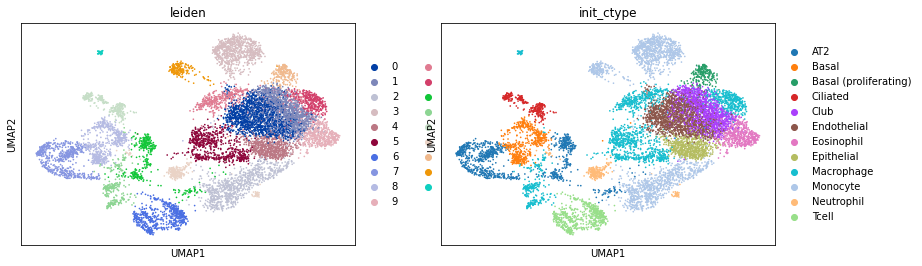


Clusters hard to identify
-------------------------
ctype2pred                                           Endothelial
cluster                                                        0
auroc                                                    0.67444
status                                                        OK
markers                                      [CD34, PECAM1, VWF]
ORs            [0.9973762037781556, 1.4344384002039503, 0.976...
ave_prec                                                0.174111
acc                                                     0.469567
sensitivity                                             0.980461
specificity                                             0.390775
Name: 2, dtype: object


In [36]:
%%time
results = pd.DataFrame()
fname = 'covid3balfs'

verbose = True
tic = time.time()
counter = 0
ORthreshold = 0.9
total_iter = len(cell_markers.keys())*len(x['cluster'].unique())
new_markers = {}
print('Lasso logistic regression')
for i,ctype in enumerate(cell_markers.keys()):
    for j,cluster in enumerate(x['cluster'].unique()):
        if verbose:
            if counter % 50 == 0 and counter != 0:
                p_through = counter / total_iter
                toc = time.time() - tic
                print('  through {:.1f}-% in {:.2f}-s\t~{:.2f}-s remain'.format(100*p_through,toc,(toc/counter)*(total_iter-counter)))
            
        # binarize & subset
        y = (x['cluster']==cluster).astype(int)
        if add_pcs:
            X = x.loc[:,cell_markers[ctype]+pcs]
        else:
            X = x.loc[:,cell_markers[ctype]]
        
        # run default params (could add CV)
        ## results, solver='saga', time for ~25k cells: >>1min
        ## results, solver='lbfgs', time for ~25k cells: 14s
        ## results, solver='liblinear', time for ~25k cells: 25s
        model = LogisticRegression(max_iter=10000, 
                                   penalty='l1',
                                   tol=1e-6,
                                   solver='liblinear') #n_jobs=-1 doesn't work for liblinear
        model.fit(X, y) 
        
        status = 'OK'
        if any(np.exp(model.coef_)[0][:-len(pcs)] < ORthreshold):
            markers = [marker for i,marker in enumerate(cell_markers[ctype]) if i not in np.where(np.exp(model.coef_)[0][:-len(pcs)]<0.9)[0]]
            if len(markers) != 0:
                new_markers[ctype] = markers
                if add_pcs:
                    X = x.loc[:,markers+pcs]
                else:
                    X = x.loc[:,markers]
                model = LogisticRegression(max_iter=10000, 
                                   penalty='l1',
                                   tol=1e-6,
                                   solver='liblinear') #n_jobs=-1 doesn't work for liblinear
                model.fit(X, y)
            else:
                status = 'No markers with ORs >= {}'.format(ORthreshold)
        else: 
            markers = cell_markers[ctype]
            
                
            
        
        p1 = model.predict_proba(X)[:,1]
        fpr, tpr, thresholds = metrics.roc_curve(y, p1)
        optimal_idx = np.argmax(tpr-fpr)
        optimal_threshold = thresholds[optimal_idx]
        optimal_pred = (p1>optimal_threshold).astype(int)
        precision,recall,_ = metrics.precision_recall_curve(y, p1)
        auprc = metrics.auc(recall, precision)
        auroc = metrics.roc_auc_score(y,p1)
        ap = metrics.average_precision_score(y,p1)
        bs = metrics.brier_score_loss(y,p1)
        acc = metrics.accuracy_score(y,optimal_pred)
        
        # store results
        dt = pd.DataFrame({'ctype2pred':ctype,
                           'cluster':cluster,
                           'auroc':auroc,
                           'status':status,
                           'markers':[markers],
                           'ORs':np.exp(model.coef_).tolist(),
                           'ave_prec':ap,
                           'acc':acc,
                           'sensitivity':tpr[optimal_idx],
                           'specificity':1-fpr[optimal_idx]},
                          index=[0])
        results = results.append(dt, ignore_index=True)
        counter += 1
print('Classifiers done. Saving and plotting...')  

top_per_ctype = pd.DataFrame()
top_n = 3
for ctype in results['ctype2pred'].unique():
    dt = results.loc[results['ctype2pred']==ctype,:]
    dt = dt.sort_values(by='auroc', ascending=False)
    top_per_ctype = top_per_ctype.append(dt.iloc[0:top_n,:], ignore_index=True)
    
top_per_cluster = pd.DataFrame()
top_n = 3
for cluster in results['cluster'].unique():
    dt = results.loc[results['cluster']==cluster,:]
    dt = dt.sort_values(by='auroc', ascending=False)
    top_per_cluster = top_per_cluster.append(dt.iloc[0:top_n,:], ignore_index=True)
    
if True:
    top_per_cluster.to_csv(os.path.join(pfp,'top_ctype_per_cluster_{}.csv'.format(fname)))
    
    
# plot init annotation
## taking top ctype per cluster
top1_per_cluster = pd.DataFrame()
for cluster in results['cluster'].unique():
    dt = results.loc[results['cluster']==cluster,:]
    dt = dt.sort_values(by='auroc', ascending=False)
    if True:
        # eliminate rows with poor status (no markers with OR>=threshold)
        dt = dt.loc[dt['status'] == 'OK',:]
    if dt.shape[0]==0:
        print('Cluster {} could not be annotated due to ORs of markers.'.format(cluster))
        continue
    top1_per_cluster = top1_per_cluster.append(dt.iloc[0:1,:], ignore_index=True)
ctype_annotation = {}
for cluster in top1_per_cluster['cluster']:
    ctype_annotation[cluster] = top1_per_cluster.loc[top1_per_cluster['cluster']==cluster,'ctype2pred'].values[0]
adata.obs['init_ctype'] = adata.obs['leiden'].astype(str)
adata.obs['init_ctype'] = adata.obs['init_ctype'].map(ctype_annotation)

## aesthetics
pal18=['#ee5264','#565656','#75a3b7','#ffe79e','#fac18a','#f1815f','#ac5861','#62354f','#2d284b','#f4b9b9','#c4bbaf',
               '#f9ebae','#aecef9','#aeb7f9','#f9aeae','#9c9583','#88bb92','#bde4a7','#d6e5e3']
cmap_ctype = {v:pal18[i] for i,v in enumerate(adata.obs['init_ctype'].unique())}

## plot
sc.pl.umap(adata, color=['leiden', 'init_ctype'])


if verbose:
    # print bad ones
    print('\nClusters hard to identify')
    print('-------------------------')
    
    underdetermined = top1_per_cluster.loc[top1_per_cluster['auroc'] <= 0.7, :]
    for i in range(underdetermined.shape[0]):
        print(underdetermined.iloc[i,:])
    

In [37]:
adata.write('/home/ngr4/project/collabs/grants/czi_rp_2103/data/processed/rpczi_cpb_combat_knn100.h5ad')

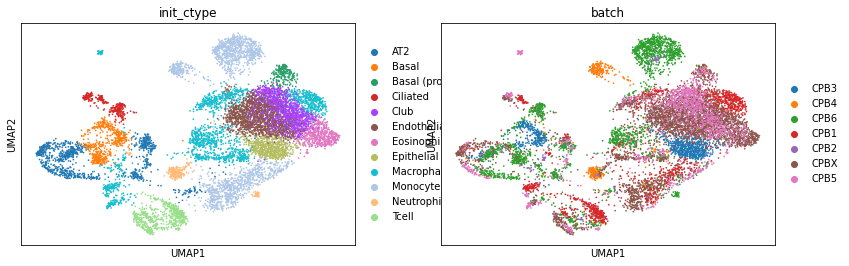

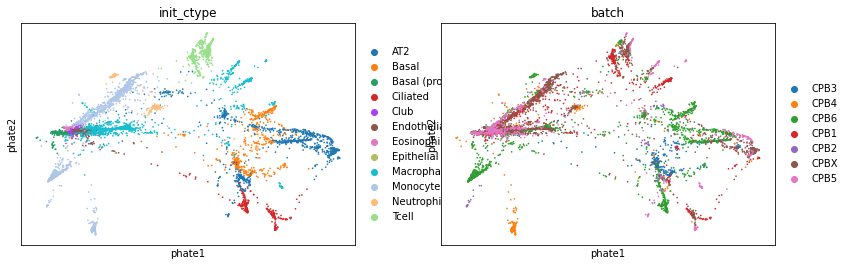

In [39]:
sc.pl.umap(adata, color=['init_ctype', 'batch'])
sc.external.pl.phate(adata, color=['init_ctype', 'batch'])

In [44]:
dt = adata.obs.groupby(['batch', 'init_ctype']).count().reset_index()[['batch', 'init_ctype', 'n_genes_by_counts']]
dt = dt.rename(columns={'n_genes_by_counts':'Count (#)'})

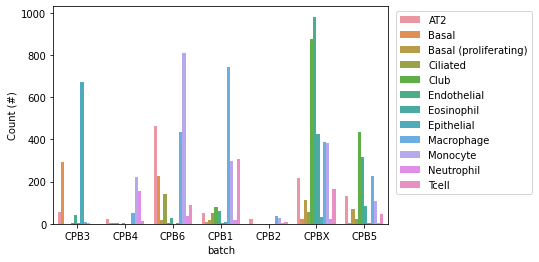

In [48]:
p = sns.barplot(x='batch', y='Count (#)', data=dt, hue='init_ctype')
p.legend(bbox_to_anchor=(1.01, 1))

In [62]:
dt = 100*adata.obs.groupby(['batch', 'init_ctype']).count()['n_genes_by_counts']/(adata.obs.groupby('batch').count()['n_genes_by_counts'])
dt = dt.reset_index()
dt = dt.rename(columns={'n_genes_by_counts':'Percent of batch (%)'})

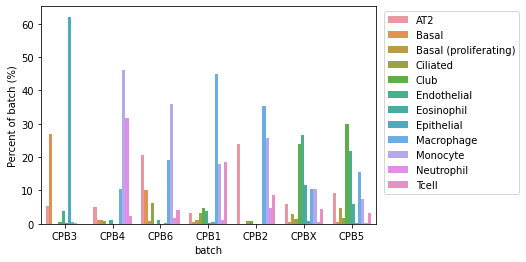

In [64]:
p = sns.barplot(x='batch', y='Percent of batch (%)', data=dt, hue='init_ctype')
p.legend(bbox_to_anchor=(1.01, 1))